In [1]:
from statsmodels.tsa.stattools import adfuller # 平稳性检测
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # 画acf, pacf图
from statsmodels.tsa.arima_model import ARIMA # ARIMA模型
from statsmodels.graphics.api import qqplot # 画qq图
from scipy.stats import shapiro # 正态检验
import statsmodels.tsa.stattools as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
import statsmodels
import seaborn as sns
import matplotlib.pylab as plt
from scipy import  stats

warnings.filterwarnings('ignore')
matplotlib.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False 


In [2]:
df = pd.read_csv("Gold Price Prediction_monthly_closing.csv",index_col=0)
#ts = df[['Date', 'Value']]
#ts = ts.set_index('Date')
df.head(10)

,XAUUSD_Close,DJ30_Close,USIDX_Close,EURUSD_Close,GBPUSD_Close,S&P500_Close,USDCAD_Close,USDCHF_Close,USDJPY_Close,WTIUSD_Close,XAGUSD_Close
Time Serie,,,,,,,,,,,
2018/3/29,1325.15,24117,89.680,1.22810,1.40910,2582.1,1.27742,0.95917,106.942,64.82,16.340
2018/4/30,1315.26,24154,91.400,1.19231,1.35571,2656.2,1.28820,1.00267,109.092,68.44,16.320
2018/5/31,1298.11,24440,93.589,1.17980,1.34174,2734.2,1.29720,0.98039,109.699,66.96,16.412
2018/6/29,1252.90,24287,94.159,1.17416,1.32798,2724.4,1.30966,0.99031,110.478,74.44,16.100
2018/7/31,1223.70,25494,94.117,1.15985,1.29379,2812.7,1.30537,0.99553,111.378,68.83,15.504
2018/8/31,1200.93,26015,94.683,1.15538,1.29169,2907.0,1.31675,0.96944,111.035,70.21,14.528
2018/9/28,1191.63,26487,94.713,1.15197,1.31135,2923.5,1.29458,0.99204,113.700,73.65,14.635
2018/10/31,1214.61,25084,96.604,1.14255,1.31272,2731.7,1.31149,1.00259,113.557,64.84,14.236
2018/11/30,1222.12,25573,96.658,1.14019,1.27352,2787.5,1.33193,0.98973,112.690,50.63,14.164


In [3]:
a=df.reset_index(drop=False)
ts=a[["Time Serie","XAUUSD_Close"]]
ts=ts.set_index("Time Serie")
ts.head(10)

,XAUUSD_Close
Time Serie,
2018/3/29,1325.15
2018/4/30,1315.26
2018/5/31,1298.11
2018/6/29,1252.90
2018/7/31,1223.70
2018/8/31,1200.93
2018/9/28,1191.63
2018/10/31,1214.61
2018/11/30,1222.12


In [4]:
ts.shape

(56, 1)

In [5]:
ts.shape[0]

56

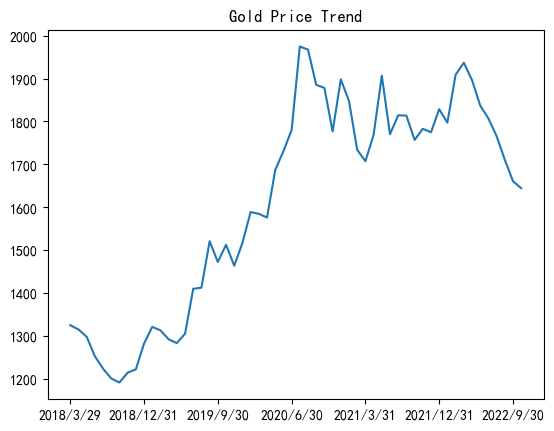

In [6]:
n_sample=ts.shape[0]
n_train=int(0.85*n_sample)+1
n_forecast=n_sample-n_train
ts_train=ts.iloc[:n_train]["XAUUSD_Close"]
ts_test=ts.iloc[n_train:]["XAUUSD_Close"]

plt.plot(ts)
plt.title("Gold Price Trend")
plt.xticks(ticks=range(0,56,9))
plt.show()

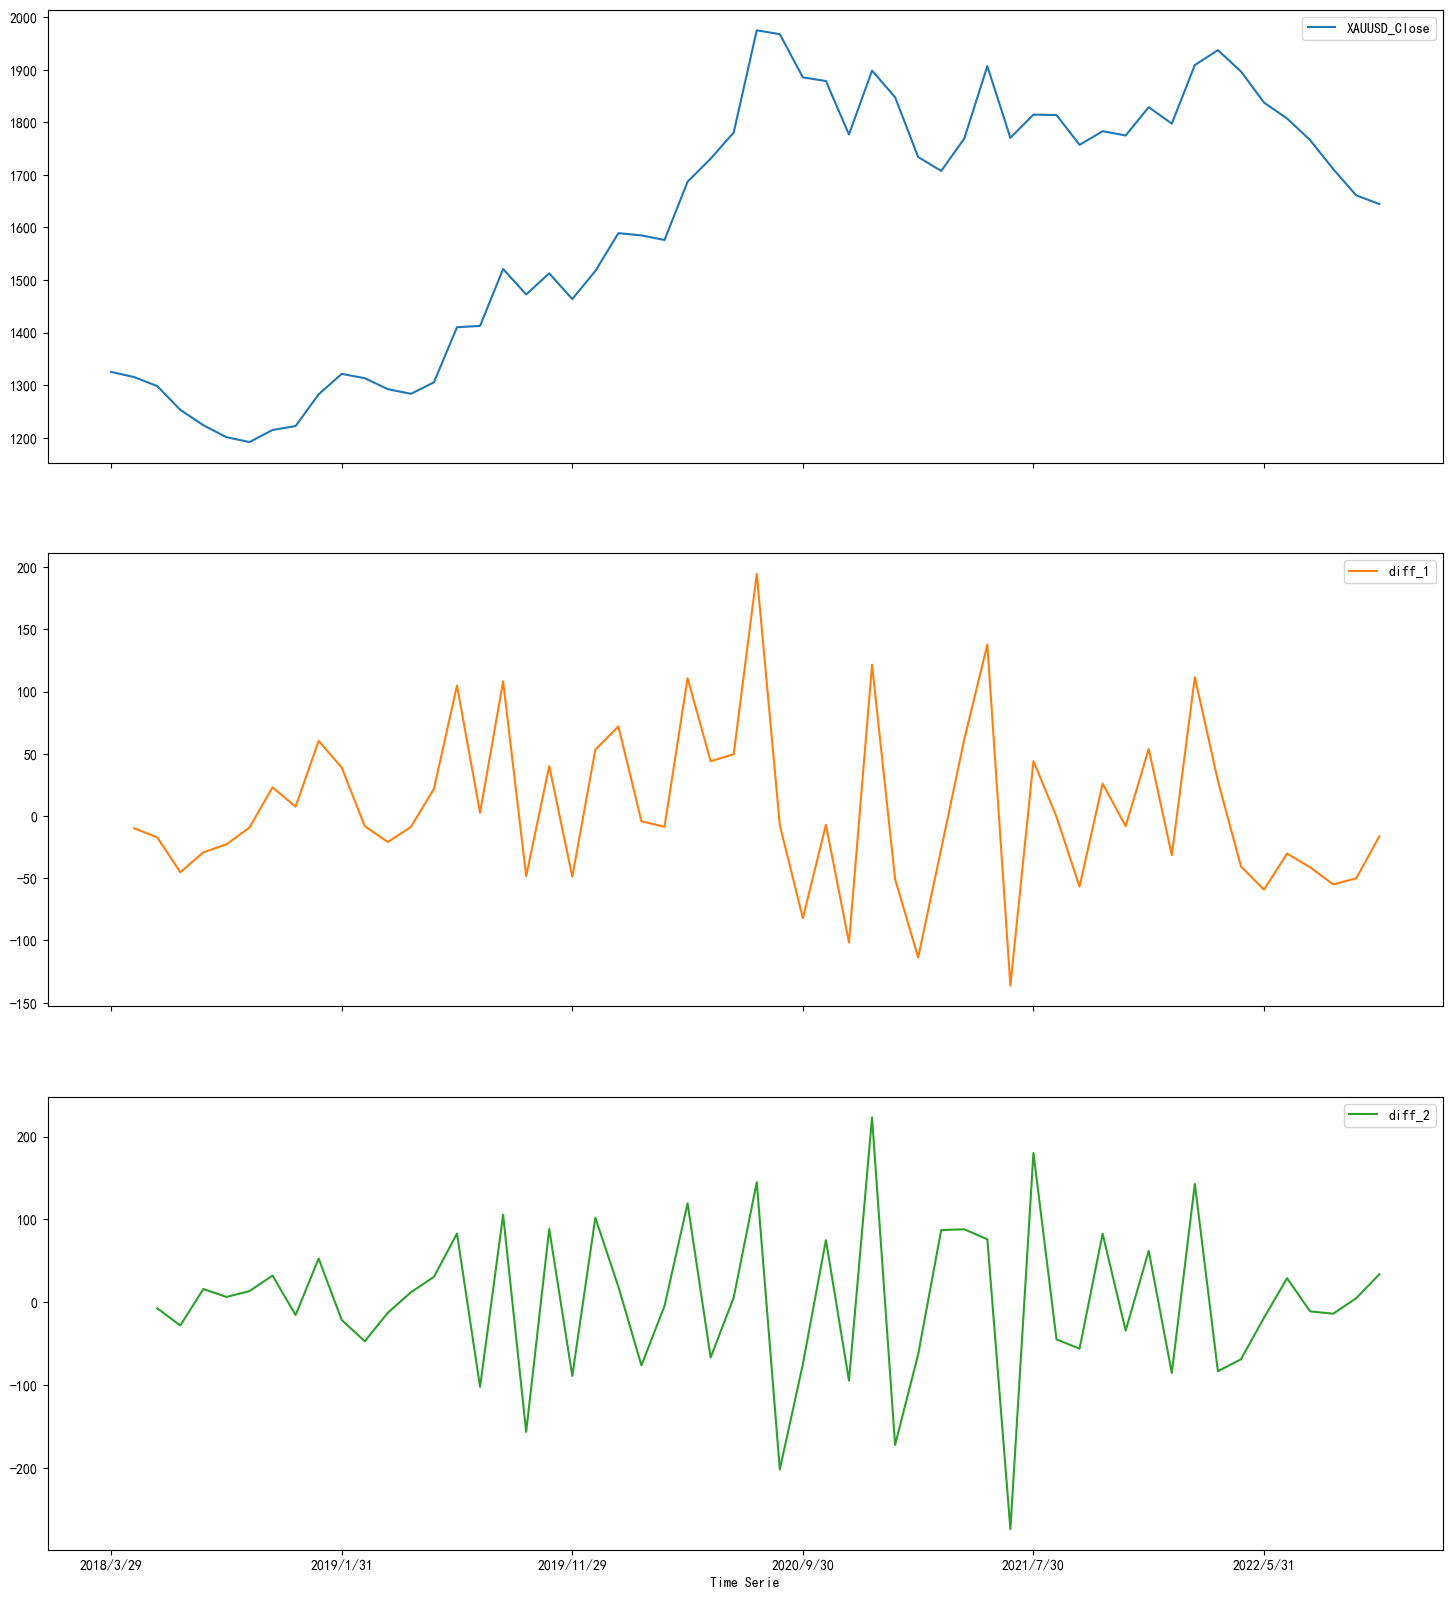

In [7]:
#差分法序列平稳化
#一般一阶或者二阶就可以让序列平稳
diff_df=ts.copy()
diff_df.index=ts.index
#diff_df.head(3)
#一阶差分
diff_df["diff_1"]=diff_df.diff(1).dropna()

#二阶差分
diff_df["diff_2"]=diff_df["diff_1"].diff(1).dropna()
#diff_df_fn=diff_df.dropna()
diff_df.plot(subplots=True,figsize=(18,20))
plt.show()

In [9]:
diff_df_fn.head(10)

NameError: name 'diff_df_fn' is not defined

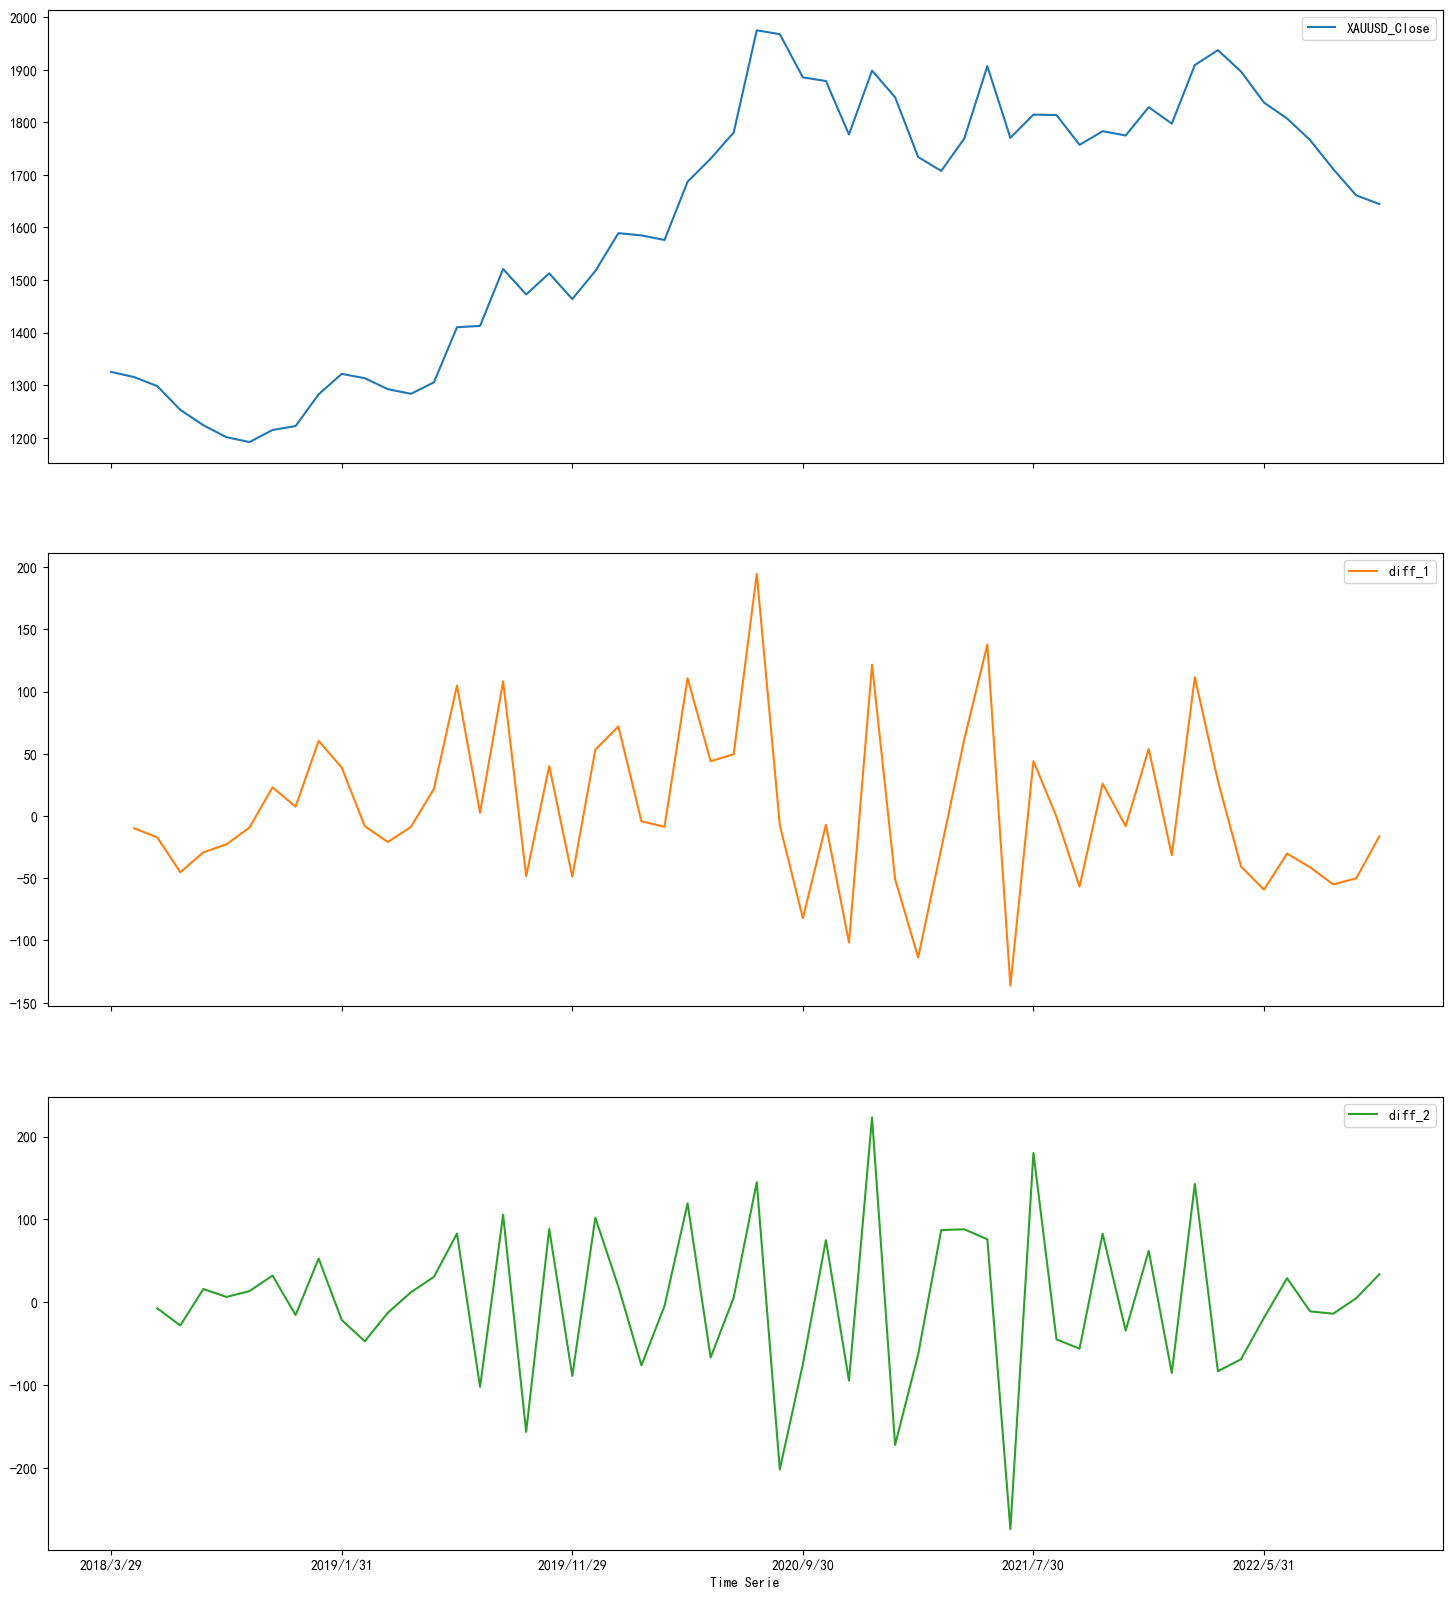

In [31]:
#作图；
diff_df.plot(subplots=True,figsize=(18,20))
plt.show()

In [12]:
#使用adfuller检测平稳性
from statsmodels.tsa.stattools import adfuller
print(adfuller(ts))
# print(adfuller(diff_df_fn["diff_1"].dropna()))
# print(adfuller(diff_df_fn["diff_2"].dropna()))
print(adfuller(diff_df["diff_1"].dropna()))
print(adfuller(diff_df["diff_2"].dropna()))

(-1.3052683213610279, 0.6267586166796115, 0, 55, {'1%': -3.5552728880540942, '5%': -2.9157312396694217, '10%': -2.5956695041322315}, 498.57458490913194)
(-7.438280993635395, 6.100830050008523e-11, 0, 54, {'1%': -3.55770911573439, '5%': -2.9167703434435808, '10%': -2.59622219478738}, 492.16896827271995)
(-6.447790863736818, 1.5502880861470936e-08, 3, 50, {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}, 492.3090072866694)


Text(0.5, 1.0, 'Gold Price Log')

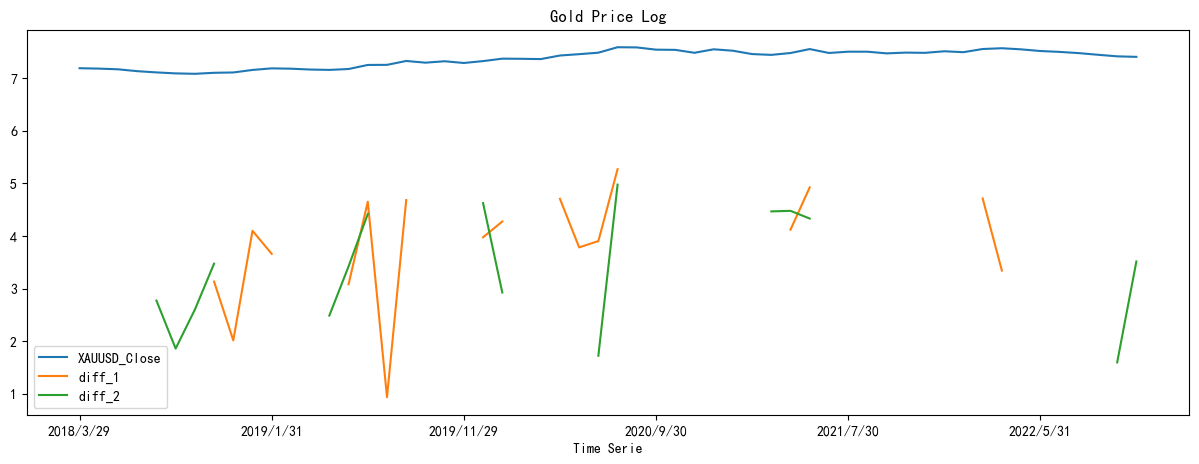

In [32]:
df_log=np.log(diff_df)
df_log.plot(figsize=(15,5))
plt.title('Gold Price Log')

In [15]:
#平滑法分为移动平均法和指数平滑法
def draw_trend(timeSeries, size):
    f = plt.figure(facecolor='white')
    
    # 对size个数据进行移动平均
    rol_mean = timeSeries.rolling(window=size).mean()
    
    
    # 对size个数据进行加权移动平均
    rol_weighted_mean = pd.DataFrame.ewm(timeSeries, span=size).mean()

    timeSeries.plot(color='blue', label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()

<Figure size 640x480 with 0 Axes>

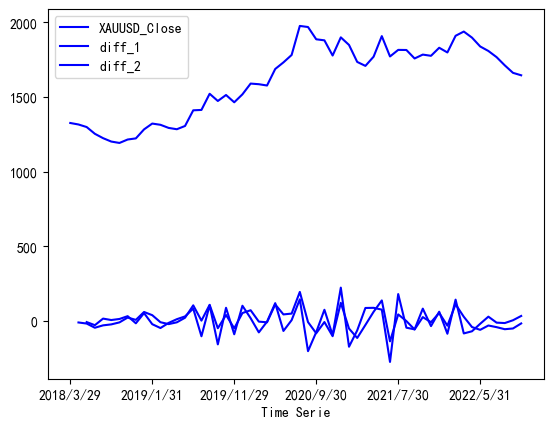

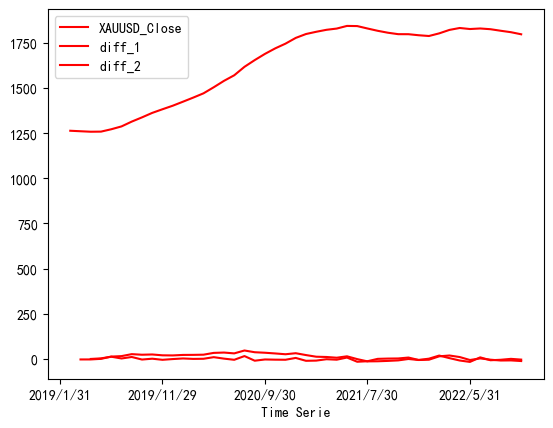

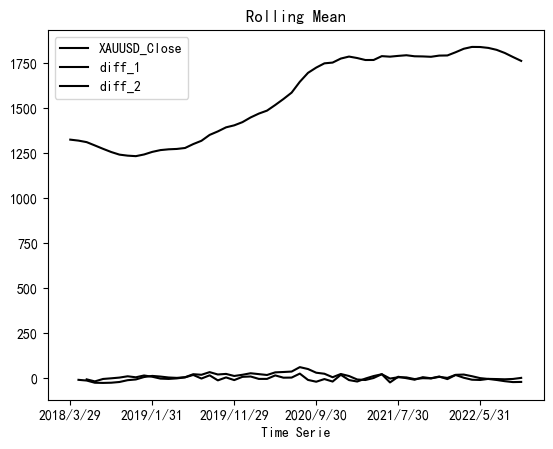

In [16]:
#做12期移动平均和指数平滑
draw_trend(diff_df,12)

In [17]:
rol_mean = diff_df.rolling(window=12).mean()
rol_mean.dropna(inplace=True)
df_role_mean_diff1 = rol_mean.diff(1)
df_role_mean_diff1.dropna(inplace=True)
print("12期移动平均后的数据：\n{}".format(rol_mean))
print("\n")
print("差分后的数据：\n{}".format(df_role_mean_diff1))


12期移动平均后的数据：
            XAUUSD_Close     diff_1     diff_2
Time Serie                                    
2019/4/30    1258.049167  -2.652500   0.088333
2019/5/31    1258.645833   0.596667   3.249167
2019/6/28    1271.742500  13.096667  12.500000
2019/7/31    1287.485000  15.742500   2.645833
2019/8/30    1314.141667  26.656667  10.914167
2019/9/30    1337.545000  23.403333  -3.253333
2019/10/31   1362.375000  24.830000   1.426667
2019/11/29   1382.511667  20.136667  -4.693333
2019/12/31   1402.064167  19.552500  -0.584167
2020/1/31    1424.370000  22.305833   2.753333
2020/2/28    1447.005833  22.635833   0.330000
2020/3/31    1470.655833  23.650000   1.014167
2020/4/30    1504.265833  33.610000   9.960000
2020/5/29    1539.721667  35.455833   1.845833
2020/6/30    1570.578333  30.856667  -4.599167
2020/7/31    1617.434167  46.855833  15.999167
2020/8/31    1654.660000  37.225833  -9.630000
2020/9/30    1689.072500  34.412500  -2.813333
2020/10/30   1719.558333  30.485833  -3.926667


In [19]:
import pandas as pd
#df_test = pd.read_csv("Gold Price Prediction_monthly_closing.csv",index_col=0)
diff_df_1=pd.read_csv('XAUUSD_diff.csv',index_col=0)
diff_df_1.head(10) 

,XAUUSD_Close,diff_1,diff_2
Time Serie,,,
31/05/2019,0.596667,3.249167,3.160833
28/06/2019,13.096667,12.500000,9.250833
31/07/2019,15.742500,2.645833,-9.854167
30/08/2019,26.656667,10.914167,8.268333
30/09/2019,23.403333,-3.253333,-14.167500
31/10/2019,24.830000,1.426667,4.680000
29/11/2019,20.136667,-4.693333,-6.120000
31/12/2019,19.552500,-0.584167,4.109167
31/01/2020,22.305833,2.753333,3.337500


In [20]:
diff_df_2=diff_df_1[0:34]

In [21]:
diff_df_2.shape

(34, 3)

In [22]:
diff_df_1.shape

(42, 3)

In [33]:
from statsmodels.tsa.stattools import adfuller
print(adfuller(diff_df["diff_1"].dropna()))
print(adfuller(diff_df["diff_2"].dropna()))


(-7.438280993635395, 6.100830050008523e-11, 0, 54, {'1%': -3.55770911573439, '5%': -2.9167703434435808, '10%': -2.59622219478738}, 492.16896827271995)
(-6.447790863736818, 1.5502880861470936e-08, 3, 50, {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}, 492.3090072866694)


In [37]:
#White noise test
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(diff_df["diff_1"].dropna(), lags = 20)


,lb_stat,lb_pvalue
1,0.057478,0.810527
2,0.086567,0.957640
3,0.092347,0.992740
4,0.119740,0.998278
5,0.802504,0.976873
6,2.168063,0.903611
7,2.304207,0.941105
8,3.414719,0.905707
9,3.473593,0.942534
10,4.723424,0.908871


In [38]:
#White noise test
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(diff_df["diff_2"].dropna(), lags = 20)

,lb_stat,lb_pvalue
1,15.948201,0.000065
2,16.003637,0.000335
3,16.009784,0.001129
4,16.351603,0.002582
5,18.386178,0.002499
6,21.237395,0.001663
7,23.337652,0.001488
8,24.937045,0.001593
9,24.960327,0.003015
10,25.936684,0.003826


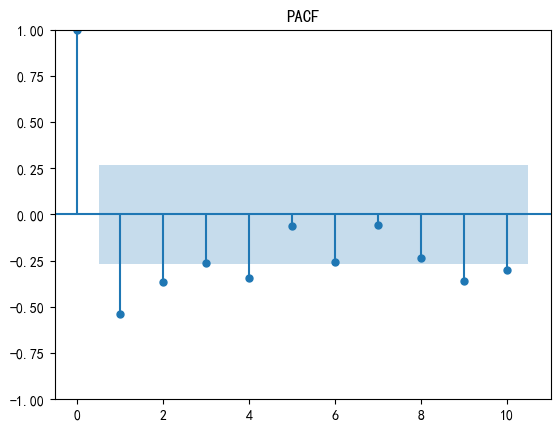

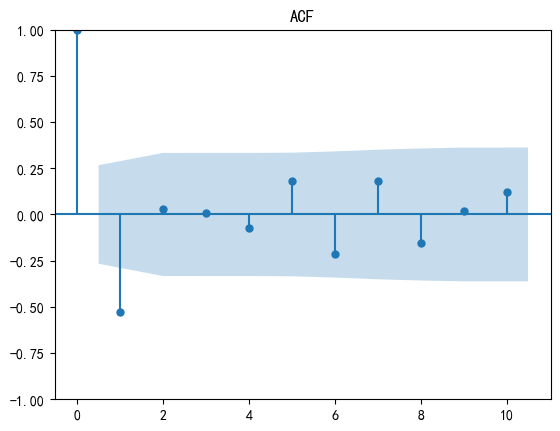

In [75]:
# 画pacf图和acf图
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pacf = plot_pacf(diff_df_fn["diff_2"], lags=10)
plt.title('PACF')
pacf.show()
acf = plot_acf(diff_df_fn["diff_2"], lags=10)
plt.title('ACF')
acf.show()


In [26]:
import itertools

# 这里最大最小的参数可以自己调
p_min = 0
d_min = 0
q_min = 0
p_max = 10
d_max = 1
q_max = 10
 
# Initialize a DataFrame to store the results,，以BIC准则
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])
 
for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
 
    try:
        model = sm.tsa.ARIMA(ts_train, order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)


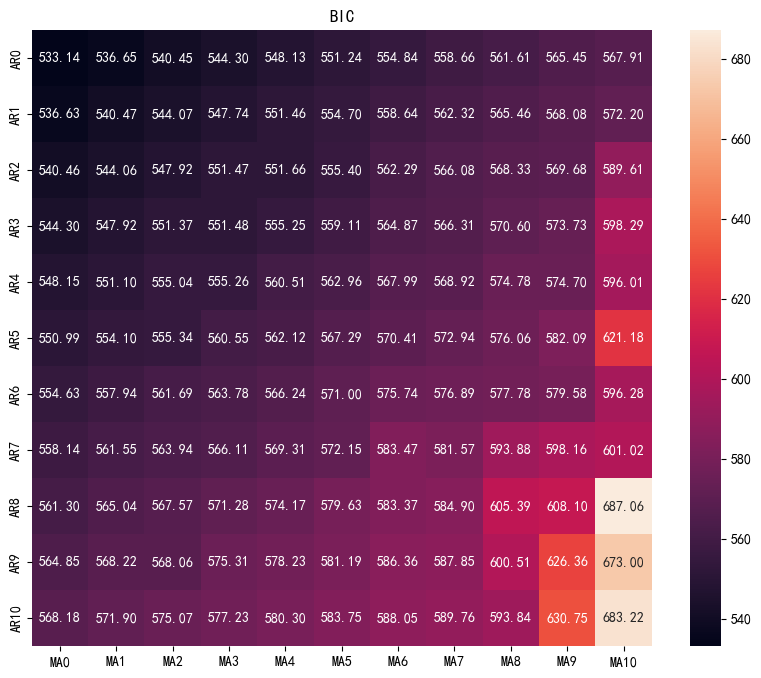

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 )
ax.set_title('BIC')
plt.show()


In [32]:
#综合考虑AIC和BIC
# 这里 max_ 数字越大运行时间越长，这里取8运行时间为 13m 13s
train_results = sm.tsa.arma_order_select_ic(ts_train, ic=['aic', 'bic'], trend='n', max_ar=8, max_ma=8)
 
print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)


AIC (1, 0)
BIC (1, 0)


In [27]:
#模型识别statsmodels.tsa.arima.model.ARIMA
from statsmodels.tsa.arima.model import ARIMA
# ARIMA(data, order=(p, d, q))
model = ARIMA(ts_train, order=(1,0,1))
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           XAUUSD_Close   No. Observations:                   48
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -271.211
Date:                Tue, 03 Jan 2023   AIC                            550.421
Time:                        16:15:31   BIC                            557.906
Sample:                             0   HQIC                           553.250
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1581.1320    242.033      6.533      0.000    1106.757    2055.507
ar.L1          0.9727      0.046     21.065      0.000       0.882       1.063
ma.L1         -0.0722      0.165     -0.438      0.662      -0.395       0.251
sigma2      4467.5588    858.645      5.203      0.000    2784.645    6150.472
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.80
Prob(Q):                              0.85   Prob(JB):                         0.25
Heteroskedasticity (H):               3.71   Skew:                             0.57
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

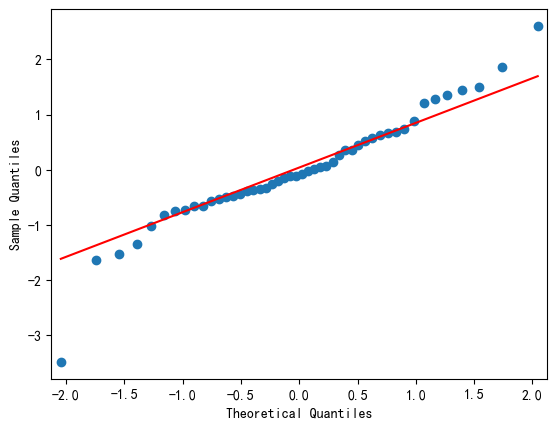

In [28]:
#残差检验
# 获取残差
resid = result.resid

# 画qq图
from statsmodels.graphics.api import qqplot
qqplot(resid, line='q', fit=True)
plt.show()

In [29]:
#正态检验
from scipy.stats import shapiro
shapiro(resid)

ShapiroResult(statistic=0.9576875567436218, pvalue=0.08140654116868973)

In [30]:
#自相关检验
import statsmodels.api as sm
print(sm.stats.durbin_watson(resid.values))

1.6867592419226185


In [80]:
#Ljung-Box检验（残差白噪声检验）
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,17), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

#

            AC         Q  Prob(>Q)
lag                               
1.0   0.000147  0.000001  0.999162
2.0   0.041355  0.089232  0.956365
3.0   0.053046  0.239308  0.971007
4.0   0.030106  0.288746  0.990529
5.0   0.127408  1.194756  0.945379
6.0  -0.049747  1.336173  0.969626
7.0   0.035637  1.410514  0.985247
8.0  -0.099271  2.001798  0.980957
9.0   0.001475  2.001932  0.991437
10.0  0.048345  2.149549  0.995060
11.0  0.003014  2.150139  0.997895
12.0  0.123193  3.161914  0.994289
13.0 -0.052211  3.348837  0.996354
14.0 -0.066134  3.657571  0.997198
15.0 -0.195961  6.450355  0.971150
16.0  0.056230  6.687495  0.978825


In [98]:
##模型预测
# 预测出来的数据也为一阶差分
# predict(起始时间，终止时间)
predict = result.predict("2018/5/31")
predict_mean=predict.rolling(window=12).mean()
predict_mean_diff1=predict_mean.diff(1)
predict_mean_diff1.dropna(axis=0).to_csv("predict_diff1.csv")

In [128]:
predict_diff1=pd.read_csv("predict_diff1.csv")
predict_diff1.head(10)

,Time Serie,predicted_mean
0,2019/5/31,-2.574847
1,2019/6/28,0.351441
2,2019/7/31,11.819217
3,2019/8/30,15.029696
4,2019/9/30,25.089913
5,2019/10/31,22.886448
6,2019/11/29,24.012128
7,2019/12/31,19.866936
8,2020/1/31,19.041644
9,2020/2/28,21.461506


In [125]:
predict_diff1=predict_diff1[0:10]

In [129]:
predict_diff1.shape

(34, 2)

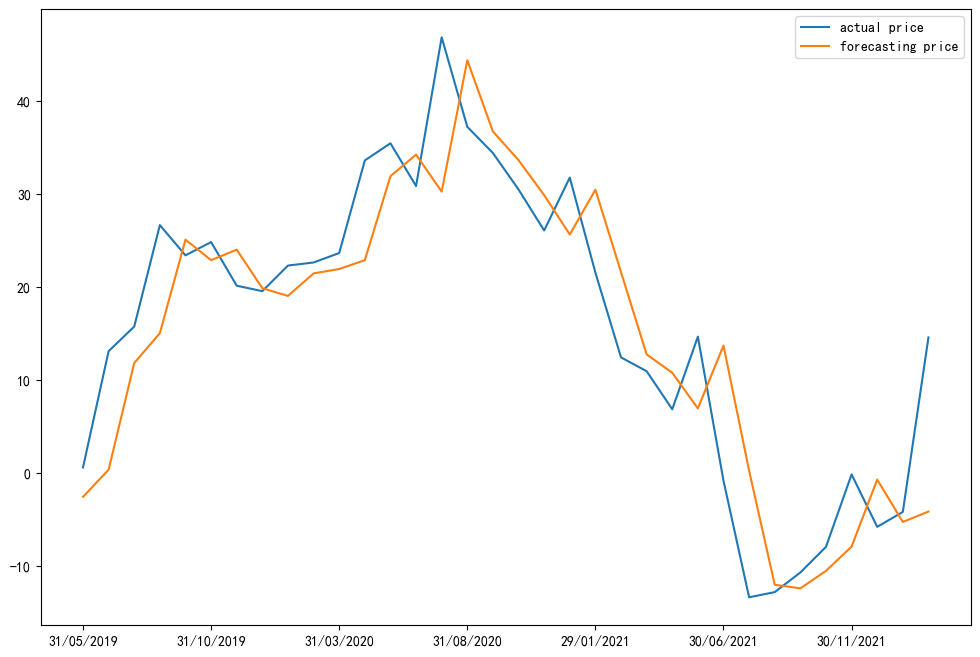

In [137]:
plt.figure(figsize=(12, 8))
#plt.plot(diff_df_fn["diff_2"])
plt.plot(diff_df_2["XAUUSD_Close"])
#plt.plot(diff_df_1["XAUUSD_Close"])
plt.plot(predict_diff1["predicted_mean"])
plt.xticks(ticks=range(0,34,5))
plt.legend(["actual price","forecasting price"])

In [ ]:
predict.head(5)
predict.shape

In [105]:
# 测试集做一阶差分
test_diff=ts_test.copy()
test_diff.head(5)
test_diff.shape

(8,)

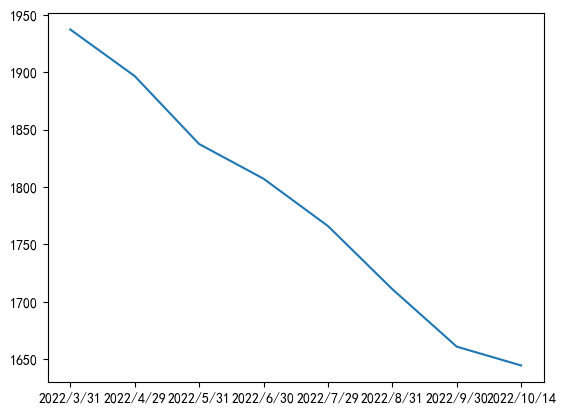

In [106]:
plt.plot(test_diff)

In [107]:
test_diff.index=ts_test.index
test_diff_fn=ts_test.diff(1).dropna()
test_diff_fn.shape

(7,)

In [135]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
print(mean_absolute_error(diff_df_2["XAUUSD_Close"],predict_diff1["predicted_mean"]).round(4))#MAE
print(mean_squared_error(diff_df_2["XAUUSD_Close"],predict_diff1["predicted_mean"]).round(4))#MSE
print(metrics.mean_squared_error(diff_df_2["XAUUSD_Close"],predict_diff1["predicted_mean"])**0.5)#RMSE
print(metrics.mean_absolute_percentage_error(diff_df_2["XAUUSD_Close"],predict_diff1["predicted_mean"]).round(4))#MAPE

5.8718
58.2133
7.629761796620454
2.4224


In [140]:
r2_score(diff_df_2["XAUUSD_Close"],predict_diff1["predicted_mean"])

0.7654421688435543